# Forecasting Demand for Food at Apollo Hospitals

In [2]:
#Import libraries
import numpy as np
import pandas as pd
#Graph Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks:
1. Create visualization plots (at least two) and describe them.
2. Calculate summary statistics for each column and write your inference about them.
3. Calculate correlation between all features (correlation matrix)
4. Create a regression model.
5. Look at the time series plots and explain your inferences.
6. Calculate the forecast for each item using: Moving average of 7 previous periods, and simple exponential smoothing with 𝛼 = 0.2.Calculate MAE and MAPE for each method. Make changes in parameters and compare the results.
7. Consider seasonality of 7 days for North Indian B/F and use decomposition method for forecasting.
8. Plot the data and it’s forecast in a plot.
9. Use forecast for one or more periods ahead.

## Loading Dataset

### Reading sheets from Excel file and loading them into required variables

In [3]:
df = pd.read_excel('D:\\Concordia\\INDU 6141 Logistic Network Models\\Personal Project\\Data file.xls') 

### How the data looks like!

In [4]:
df.head()

,Date,BKFST_OCCUP,Idly,Dosa,Chutney,Sambar,Continental B/F,North Indian B/F,Omellette
0,2012-10-01,250,40,30,95,95,25,6,15
1,2012-10-02,236,65,33,120,120,25,2,7
2,2012-10-03,244,59,21,119,120,25,2,8
3,2012-10-04,239,65,42,140,150,35,5,10
4,2012-10-05,221,70,26,126,126,41,3,13


### Data at a glance

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              115 non-null    datetime64[ns]
 1   BKFST_OCCUP       115 non-null    int64         
 2   Idly              115 non-null    int64         
 3   Dosa              115 non-null    int64         
 4   Chutney           115 non-null    int64         
 5   Sambar            115 non-null    int64         
 6   Continental B/F   115 non-null    int64         
 7   North Indian B/F  115 non-null    int64         
 8   Omellette         115 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 8.2 KB


In [5]:
df.describe()

,BKFST_OCCUP,Idly,Dosa,Chutney,Sambar,Continental B/F,North Indian B/F,Omellette
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,215.156522,59.269565,25.478261,131.339130,131.469565,41.304348,4.347826,13.591304
std,19.376958,7.034154,11.375835,10.874795,11.123171,5.793484,1.991400,5.263072
min,151.000000,40.000000,0.000000,95.000000,95.000000,25.000000,0.000000,5.000000
25%,200.000000,54.000000,18.000000,125.000000,125.000000,40.000000,2.500000,10.000000
50%,215.000000,61.000000,22.000000,130.000000,130.000000,40.000000,5.000000,13.000000
75%,228.500000,65.000000,27.000000,135.000000,136.000000,44.000000,6.000000,20.000000
max,259.000000,70.000000,62.000000,160.000000,160.000000,55.000000,8.000000,22.000000


**Insights:**\
The data is collected over 115 days from October 2012 to January 2013.\
The minimum occupancy for a day is 151, while the maximum is 259, with an average of 215.15.\
The average no. of orders of Chutney and Sambhar are similar and are the highest among of all, which means these two items are frequently ordered.\
Each item except Dosa and North Indian B/F were ordered daily.\
The average no. of orders for North Indian B/F is least among all of them.

## Data Cleanup

### Check for null values

In [6]:
df.isnull().sum()

Date                0
BKFST_OCCUP         0
Idly                0
Dosa                0
Chutney             0
Sambar              0
Continental B/F     0
North Indian B/F    0
Omellette           0
dtype: int64

## Exploratory Data Analysis

### Data Visualization

#### Box Plot

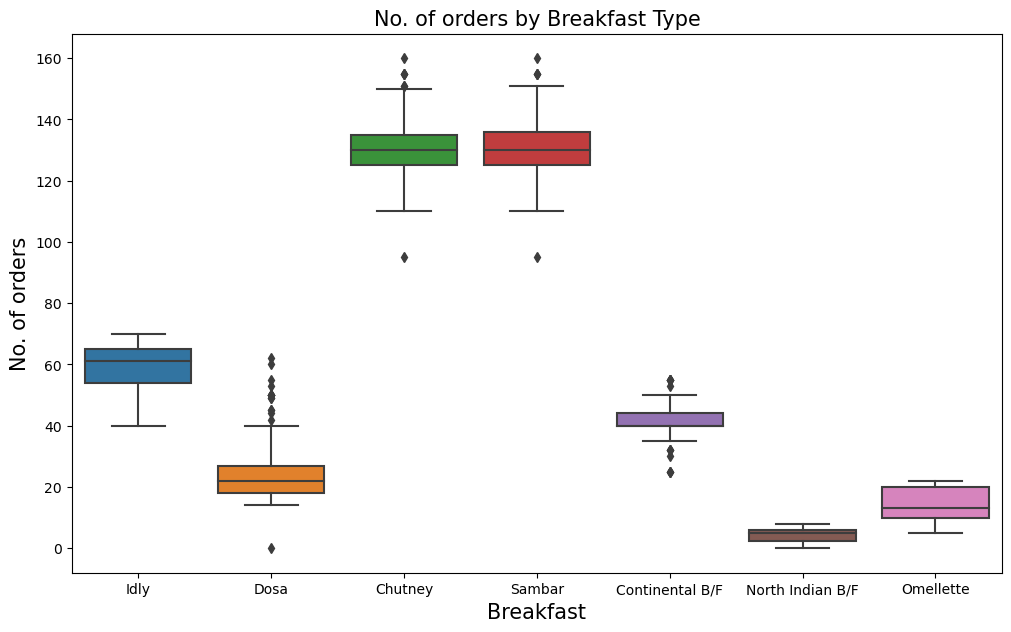

In [6]:
plt.figure(figsize= (12,7))
sns.boxplot(x= "variable", y= "value",data= pd.melt(df.drop(['Date', 'BKFST_OCCUP'], axis= 1)))
plt.xlabel('Breakfast', size= 15)
plt.ylabel('No. of orders', size= 15)
plt.title('No. of orders by Breakfast Type', size= 15)

plt.show()

**Insights:**\
Chutney and Sambhar are mostly ordered, since they are sides to various main dishes.\
North Indian breakfast is least ordered menu item.

#### Scatter Plot

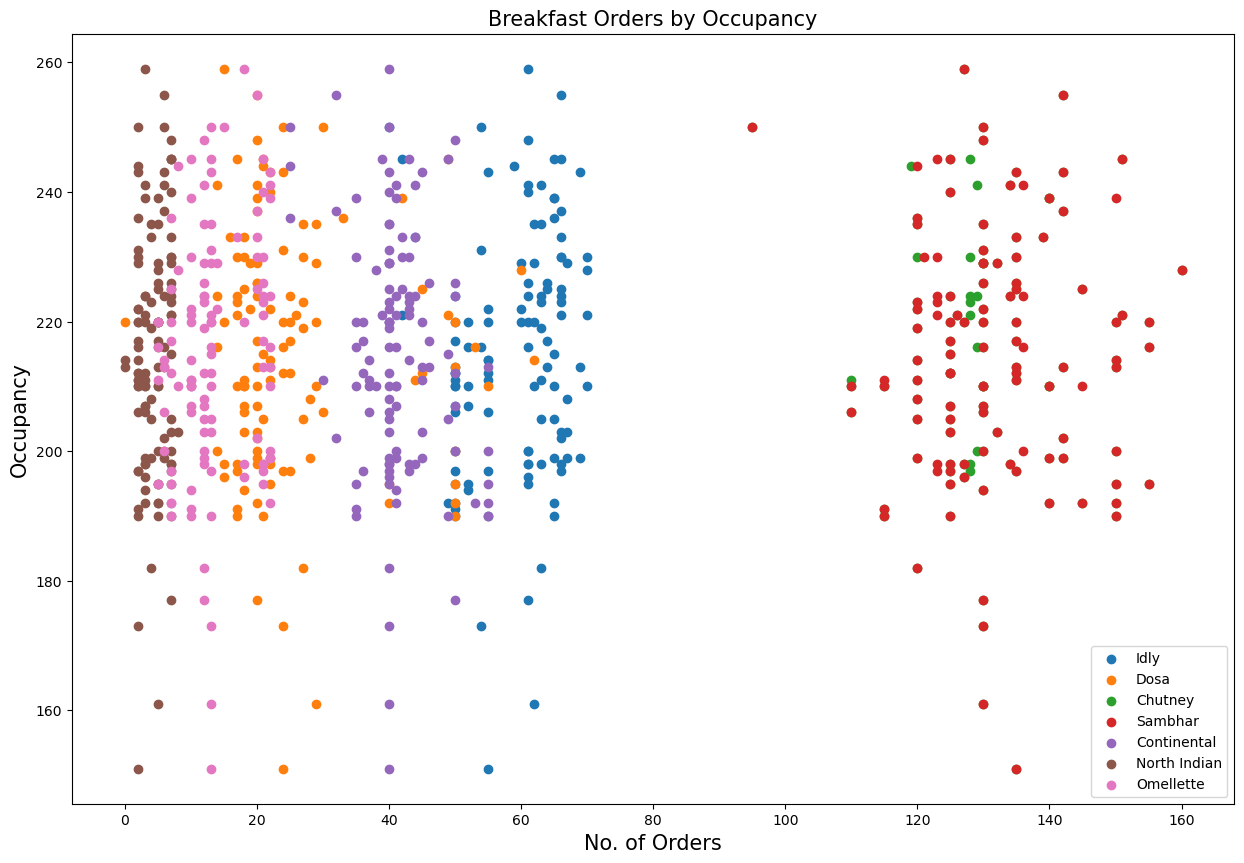

In [7]:
plt.figure(figsize=(15,10))
plt.scatter(x= 'Idly', y= 'BKFST_OCCUP', data= df, label= 'Idly')
plt.scatter(x= 'Dosa', y= 'BKFST_OCCUP', data= df, label= 'Dosa')
plt.scatter(x= 'Chutney', y= 'BKFST_OCCUP', data= df, label= 'Chutney')
plt.scatter(x= 'Sambar', y= 'BKFST_OCCUP', data= df, label= 'Sambhar')
plt.scatter(x= 'Continental B/F', y= 'BKFST_OCCUP', data= df, label= 'Continental')
plt.scatter(x= 'North Indian B/F', y= 'BKFST_OCCUP', data= df, label= 'North Indian')
plt.scatter(x= 'Omellette', y= 'BKFST_OCCUP', data= df, label= 'Omellette')

plt.ylabel('Occupancy', size= 15)
plt.xlabel('No. of Orders', size= 15)
plt.title('Breakfast Orders by Occupancy', size= 15)
plt.legend(loc= 'best')

plt.show()

**Insights:**\
All menu items seems to increase with increase in occupancy, except Chutney, which seems to have not increase with increase in occupancy. This can be confirmed with the correlation matrix later on.\
Most of the items are ordered when the occupancy in the range 190-250.\
Chutney is not ordered when the occupancy is in the range 0-190.\
Dosa seems to be have most spread and Chutney seems to be least spread.

#### Correlation Matrix

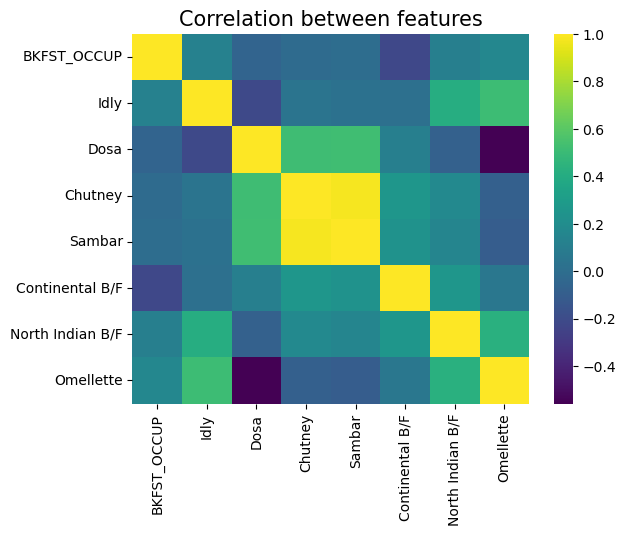

In [8]:
#Correlation Matrix DF
corr_df= df.corr()
#Correlation Matrix
sns.heatmap(corr_df, cmap= 'viridis')

plt.title('Correlation between features', size= 15)
plt.show()

**Insights:**\
Continental breakfast is not positively correlated with the occupancy quantity.\
Idly has good correalation with Omellette and North Indian breakfast, which means that these are ordered together.\
Chutney and Sambhar are positively correaled with Dosa, which means that they are ordered together.\
Dosa is negatively correlated with Omellette, which means only either one of them is ordered more on a given day.\
Chutney is highly correlated with Sambhar, which means these two are ordered together and possibly in a pair, which confirms our previous finding.

#### Time Series Plots

In [1]:
def time_df(y, title):
    plt.figure(figsize=(15,7))
    plt.plot('Date', y, data= df)
    
    plt.xlabel('Date', size= 15)
    plt.ylabel(y, size= 15)
    plt.title(title, size= 15)
    plt.show()

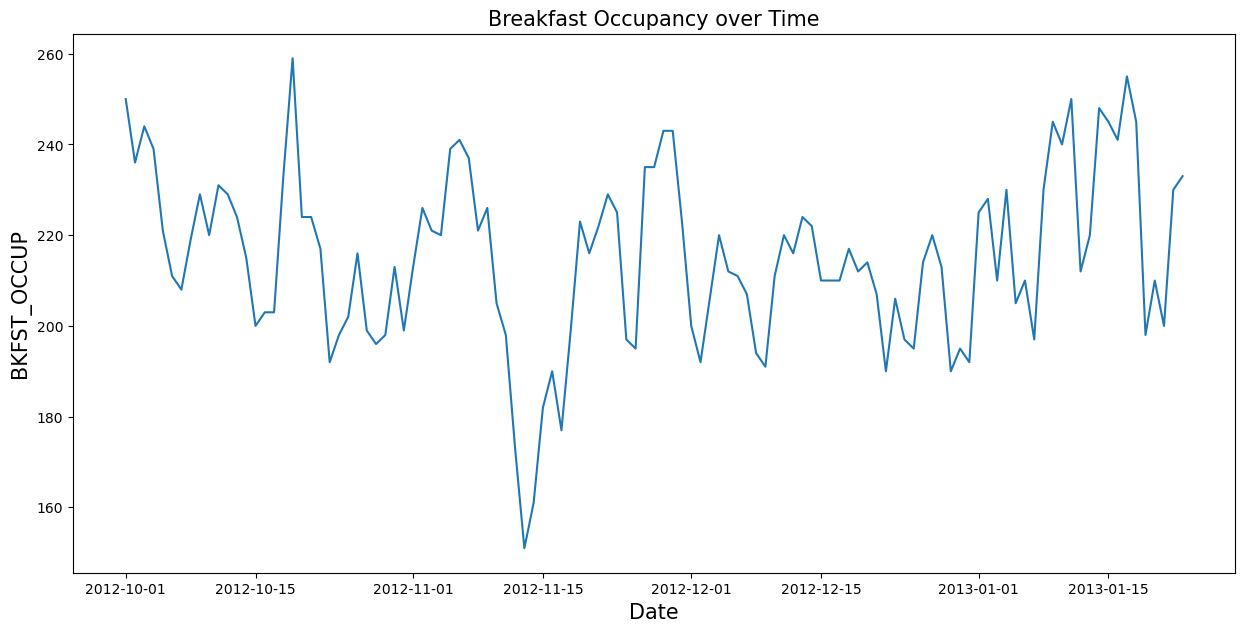

In [5]:
time_df('BKFST_OCCUP', 'Breakfast Occupancy over Time')

**Insights:**\
The time series of breakfast occupancy seem to have trend fluctuating between 200 and 240.

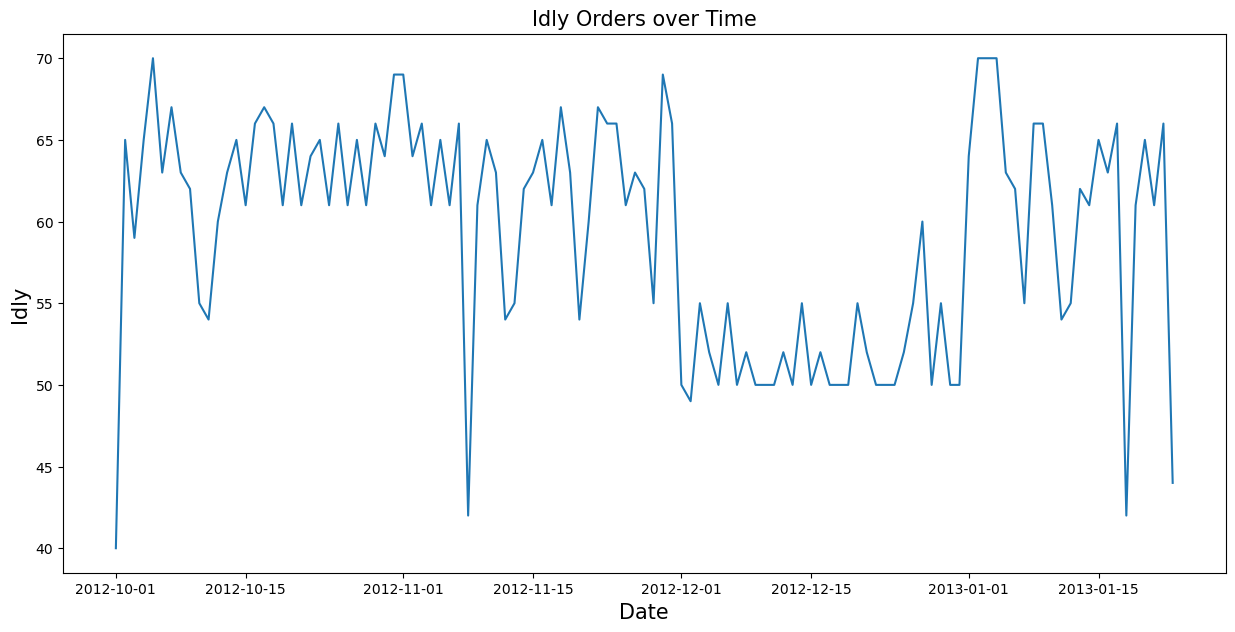

In [9]:
time_df('Idly', 'Idly Orders over Time')

**Insights:**\
The time series of Idly orders seem to have no particular pattern or trend, with fluctuating orders day by day.

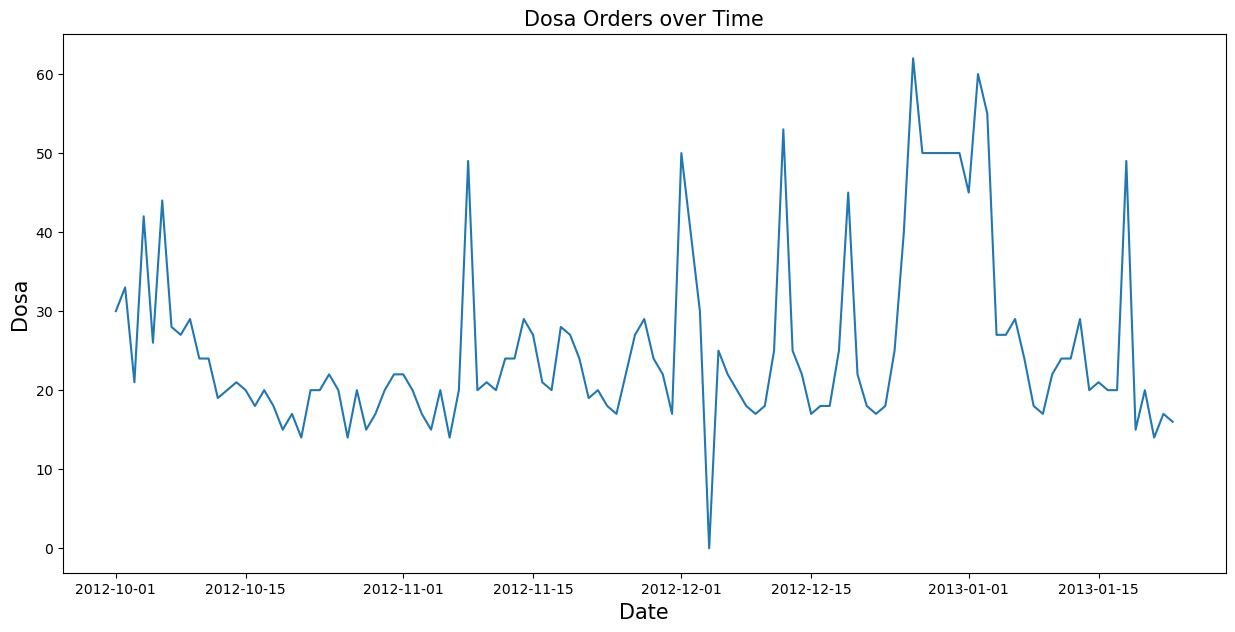

In [10]:
time_df('Dosa', 'Dosa Orders over Time')

**Insights:**\
The time series of Dosa orders seem to have a weekly cyclic trend of fluctuations.

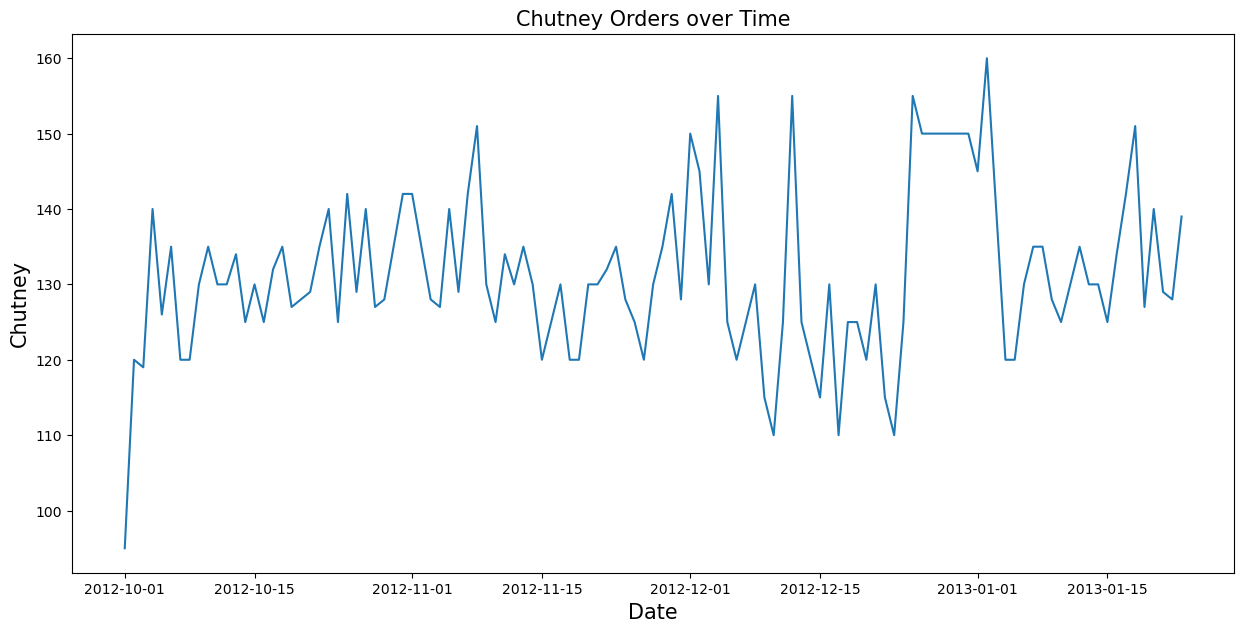

In [11]:
time_df('Chutney', 'Chutney Orders over Time')

**Insights:**\
The time series of Chutney orders have a daily fluctuating trend.

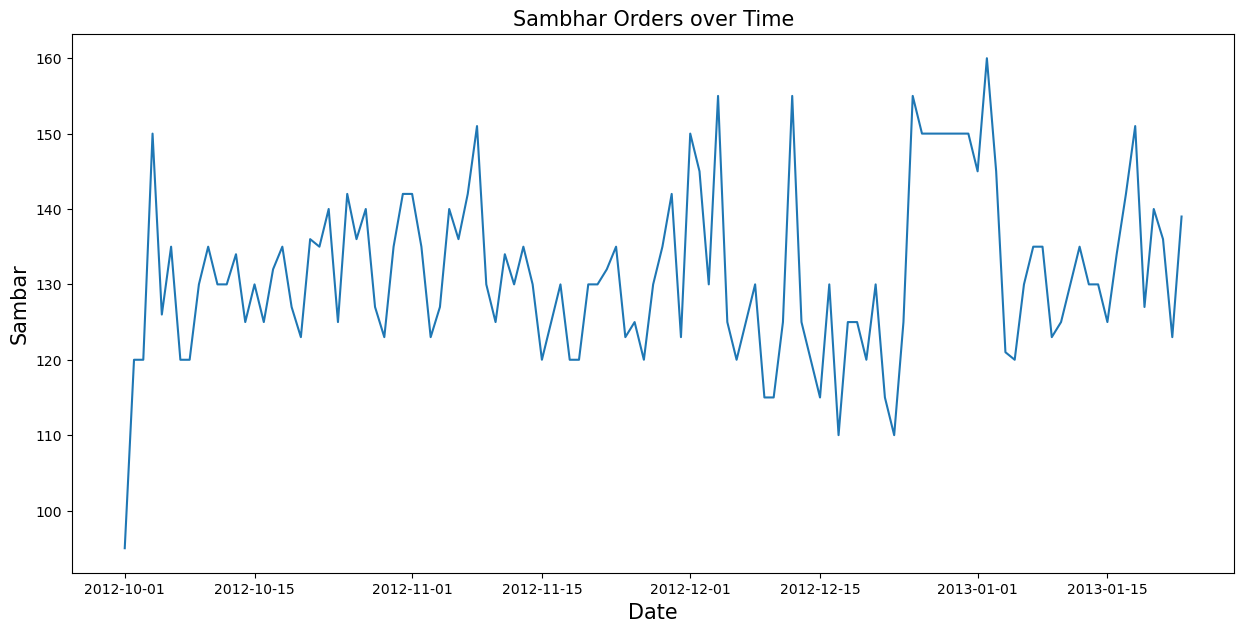

In [12]:
time_df('Sambar', 'Sambhar Orders over Time')

**Insights:**\
The time series of Sambhar orders have a trend between 120 & 140.

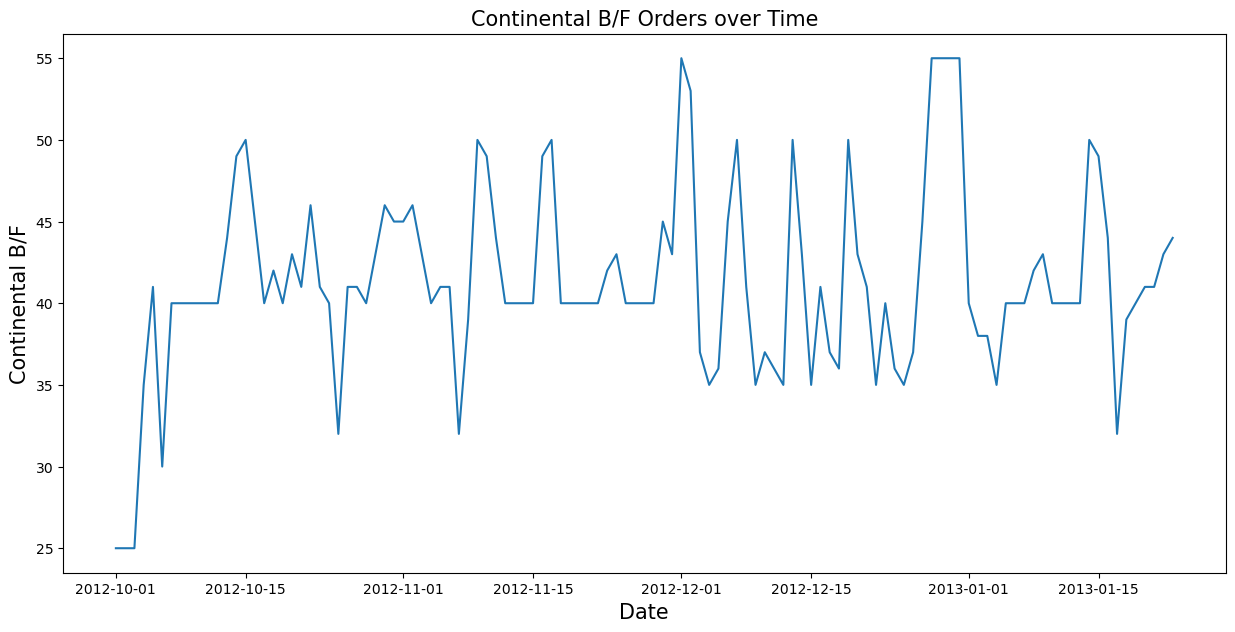

In [13]:
time_df('Continental B/F', 'Continental B/F Orders over Time')

**Insights:**\
The time series of Continental B/F orders do not have any particular trend.

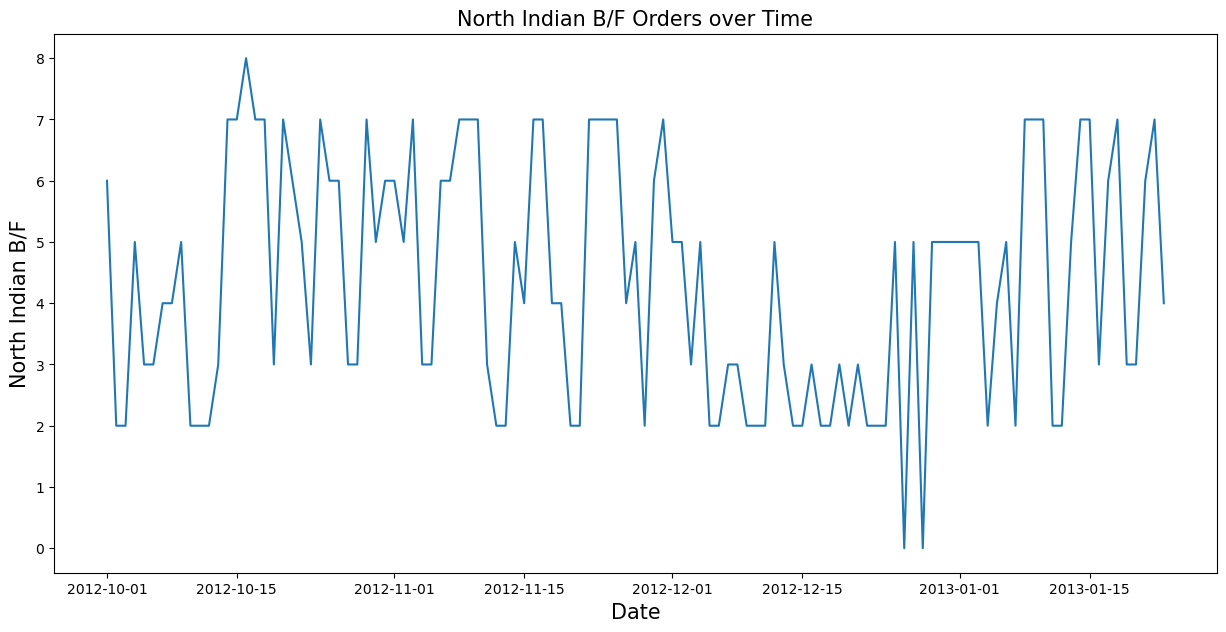

In [14]:
time_df('North Indian B/F', 'North Indian B/F Orders over Time')

**Insights:**\
North Indian B/Fs are ordered in a fluctuating trend below 8.

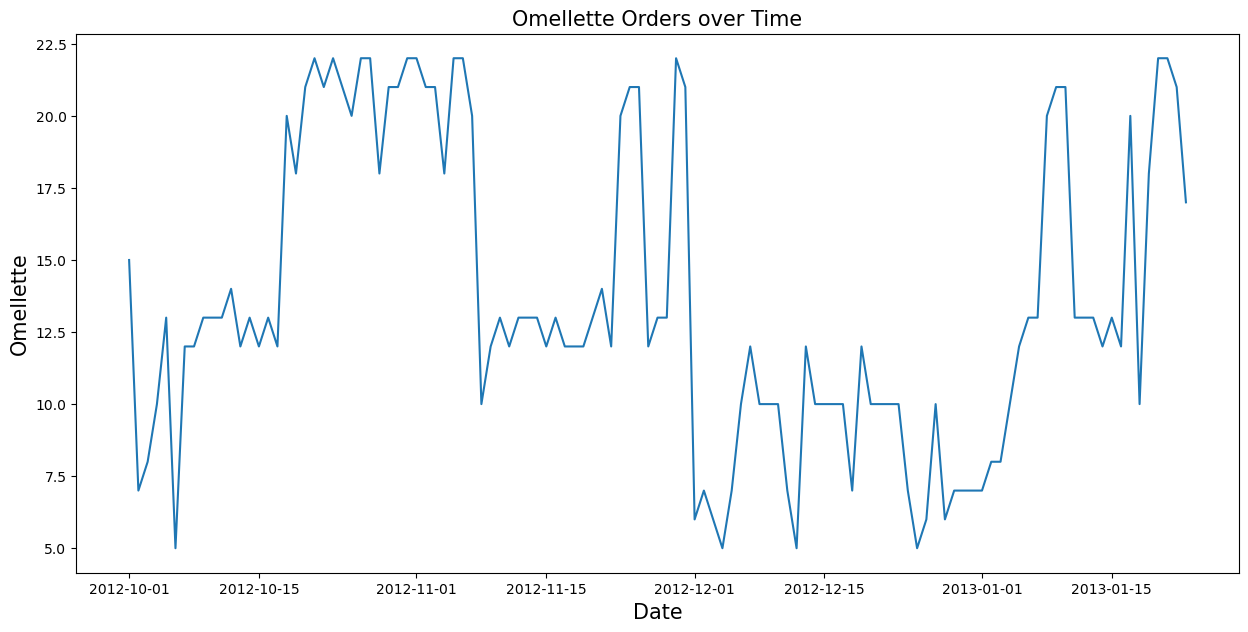

In [15]:
time_df('Omellette', 'Omellette Orders over Time')

**Insights:**\
Omellete orders show a weak cyclic pattern of lows and highs which last for a week.

## Data Preprocessing

### Variables Definition

In [19]:
#Decision Variables
X= df.drop(['Date', 'BKFST_OCCUP'], axis= 1)
#Target Variable
y= df['BKFST_OCCUP']

### Train Test Split

In [20]:
#Package Import
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)

## Regression Model

### Model Fitting

In [22]:
#Package Import
from sklearn.linear_model import LinearRegression

In [23]:
model= LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

### Model Performance Evaluation

In [20]:
#Package Import
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [26]:
#Errors Definition
test_predictions= model.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test, test_predictions))
mape= mean_absolute_percentage_error(y_test, test_predictions)

In [27]:
rmse

21.365392637554148

In [28]:
mape

0.08053938252256414

### Residual Plots

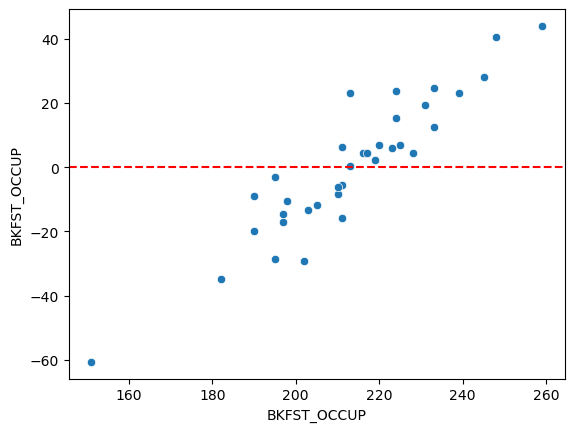

In [29]:
lr_res= y_test - test_predictions

sns.scatterplot(x= y_test, y= lr_res)
plt.axhline(y=0, color= 'r', ls= '--')

plt.show()

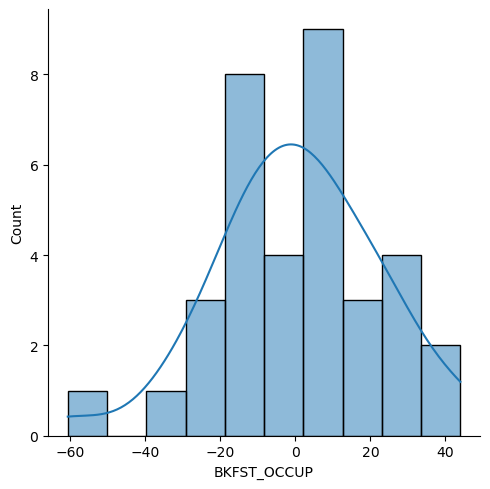

In [30]:
sns.displot(lr_res, bins= 10, kde= True)
plt.show()

## Data Postprocessing

In [31]:
final_model= LinearRegression()

In [32]:
final_model.fit(X,y)

LinearRegression()

### Coefficients

In [34]:
final_model.intercept_

230.90718540590365

In [35]:
coeff_df= pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Idly,0.030561
Dosa,0.098309
Chutney,-0.270243
Sambar,0.295192
Continental B/F,-0.874865
North Indian B/F,1.042305
Omellette,0.604948


## Forecasting

In [18]:
#Package Import
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.api import SimpleExpSmoothing

### Moving Average

In [37]:
def ma_forecast(item):
    #Create dataframe
    ma_df= df[['Date',item]]
    #Moving average of 7 previous periods
    ma_df['MA_7']= ma_df[item].rolling(7).mean()
    
    #Plotting the figure
    plt.figure(figsize=(15,7))
    plt.plot('Date', item, data= ma_df, label= 'Orders')
    plt.plot('Date', 'MA_7', data= ma_df, label= 'MA')
    plt.xlabel('Date', size= 15)
    plt.ylabel(item, size= 15)
    plt.title('7 Days Moving Average Plot', size= 15)
    plt.legend()
    plt.show()
    
    #Errors
    ma_error_df= ma_df.dropna()
    mae= mean_absolute_error(ma_error_df[item], ma_error_df['MA_7'])
    mape= mean_absolute_percentage_error(ma_error_df[item], ma_error_df['MA_7'])
    print('Mean Absolute Error is %.2f' %mae)
    print('Mean Absolute Percentage Error is %.2f' %(mape*100),'%')
    
    #Forecast Quality
    if mape<= 0.1:
        print('Forecast Quality is very good')
    elif mape<= 0.2:
        print('Forecast Quality is good')
    elif mape<= 0.3:
        print('Forecast Quality is moderate')
    else:
        print('Forecast Quality is poor')
        
    #Forecasted DF
    ma_fore_df= ma_df.append(pd.DataFrame({'Date':pd.date_range(start=ma_df['Date'].iloc[-1], 
                                                                periods=5, inclusive='right')}))
    for i in range(115,):
        ma_fore_df[item]= ma_fore_df[item].fillna(0)
        ma_fore_df['MA_7']= ma_fore_df['MA_7'].fillna(ma_fore_df[item].rolling(7).mean())
            
    #Datapoints
    print('\n')
    with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2
                       ):
        print(ma_fore_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['MA_7']= ma_df[item].rolling(7).mean()


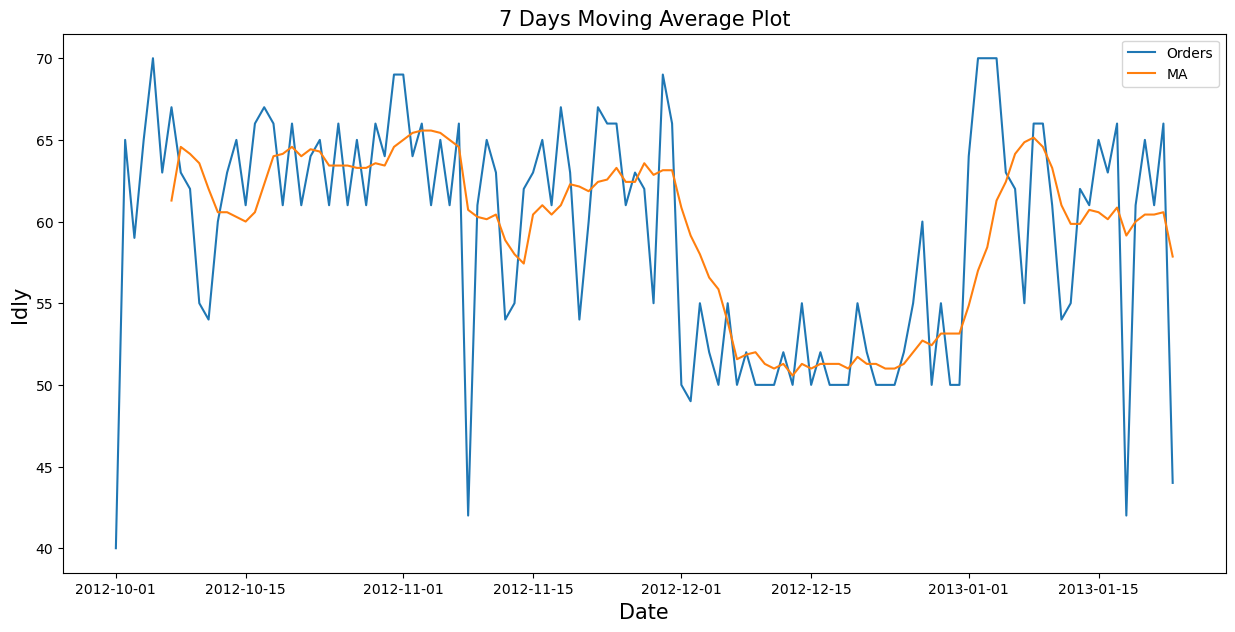

Mean Absolute Error is 3.62
Mean Absolute Percentage Error is 6.38 %
Forecast Quality is very good


          Date  Idly   MA_7
0   2012-10-01  40.0    NaN
1   2012-10-02  65.0    NaN
2   2012-10-03  59.0    NaN
3   2012-10-04  65.0    NaN
4   2012-10-05  70.0    NaN
5   2012-10-06  63.0    NaN
6   2012-10-07  67.0  61.29
7   2012-10-08  63.0  64.57
8   2012-10-09  62.0  64.14
9   2012-10-10  55.0  63.57
10  2012-10-11  54.0  62.00
11  2012-10-12  60.0  60.57
12  2012-10-13  63.0  60.57
13  2012-10-14  65.0  60.29
14  2012-10-15  61.0  60.00
15  2012-10-16  66.0  60.57
16  2012-10-17  67.0  62.29
17  2012-10-18  66.0  64.00
18  2012-10-19  61.0  64.14
19  2012-10-20  66.0  64.57
20  2012-10-21  61.0  64.00
21  2012-10-22  64.0  64.43
22  2012-10-23  65.0  64.29
23  2012-10-24  61.0  63.43
24  2012-10-25  66.0  63.43
25  2012-10-26  61.0  63.43
26  2012-10-27  65.0  63.29
27  2012-10-28  61.0  63.29
28  2012-10-29  66.0  63.57
29  2012-10-30  64.0  63.43
30  2012-10-31  69.0  64.57
31 

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ma_fore_df= ma_df.append(pd.DataFrame({'Date':pd.date_range(start=ma_df['Date'].iloc[-1], periods=5, inclusive='right')}))


In [38]:
ma_forecast('Idly')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['MA_7']= ma_df[item].rolling(7).mean()


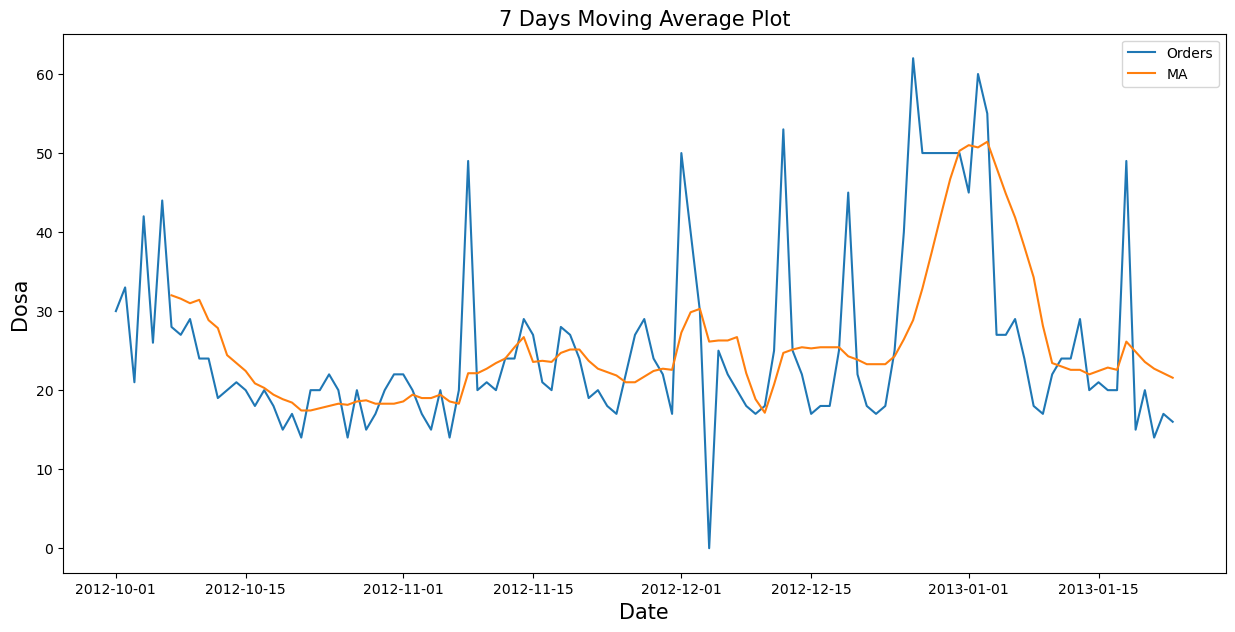

Mean Absolute Error is 5.90
Mean Absolute Percentage Error is 108015561180707856.00 %
Forecast Quality is poor


          Date  Dosa   MA_7
0   2012-10-01  30.0    NaN
1   2012-10-02  33.0    NaN
2   2012-10-03  21.0    NaN
3   2012-10-04  42.0    NaN
4   2012-10-05  26.0    NaN
5   2012-10-06  44.0    NaN
6   2012-10-07  28.0  32.00
7   2012-10-08  27.0  31.57
8   2012-10-09  29.0  31.00
9   2012-10-10  24.0  31.43
10  2012-10-11  24.0  28.86
11  2012-10-12  19.0  27.86
12  2012-10-13  20.0  24.43
13  2012-10-14  21.0  23.43
14  2012-10-15  20.0  22.43
15  2012-10-16  18.0  20.86
16  2012-10-17  20.0  20.29
17  2012-10-18  18.0  19.43
18  2012-10-19  15.0  18.86
19  2012-10-20  17.0  18.43
20  2012-10-21  14.0  17.43
21  2012-10-22  20.0  17.43
22  2012-10-23  20.0  17.71
23  2012-10-24  22.0  18.00
24  2012-10-25  20.0  18.29
25  2012-10-26  14.0  18.14
26  2012-10-27  20.0  18.57
27  2012-10-28  15.0  18.71
28  2012-10-29  17.0  18.29
29  2012-10-30  20.0  18.29
30  2012-10-31  22.

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ma_fore_df= ma_df.append(pd.DataFrame({'Date':pd.date_range(start=ma_df['Date'].iloc[-1], periods=5, inclusive='right')}))


In [39]:
ma_forecast('Dosa')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['MA_7']= ma_df[item].rolling(7).mean()


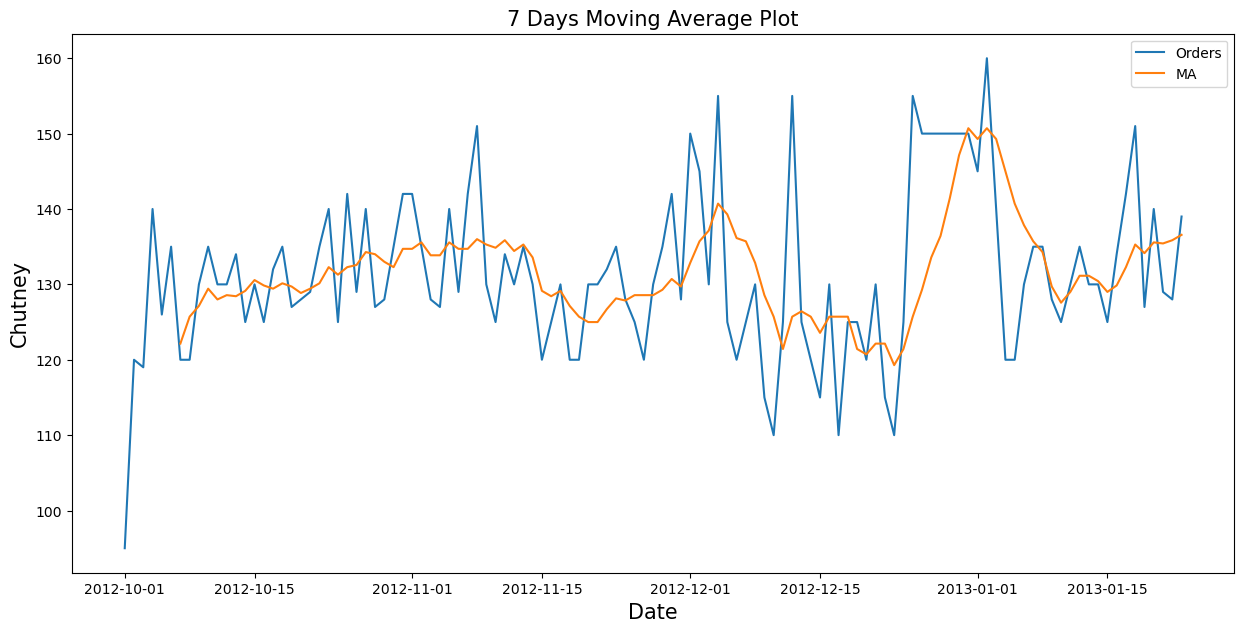

Mean Absolute Error is 6.70
Mean Absolute Percentage Error is 5.05 %
Forecast Quality is very good


          Date  Chutney    MA_7
0   2012-10-01     95.0     NaN
1   2012-10-02    120.0     NaN
2   2012-10-03    119.0     NaN
3   2012-10-04    140.0     NaN
4   2012-10-05    126.0     NaN
5   2012-10-06    135.0     NaN
6   2012-10-07    120.0  122.14
7   2012-10-08    120.0  125.71
8   2012-10-09    130.0  127.14
9   2012-10-10    135.0  129.43
10  2012-10-11    130.0  128.00
11  2012-10-12    130.0  128.57
12  2012-10-13    134.0  128.43
13  2012-10-14    125.0  129.14
14  2012-10-15    130.0  130.57
15  2012-10-16    125.0  129.86
16  2012-10-17    132.0  129.43
17  2012-10-18    135.0  130.14
18  2012-10-19    127.0  129.71
19  2012-10-20    128.0  128.86
20  2012-10-21    129.0  129.43
21  2012-10-22    135.0  130.14
22  2012-10-23    140.0  132.29
23  2012-10-24    125.0  131.29
24  2012-10-25    142.0  132.29
25  2012-10-26    129.0  132.57
26  2012-10-27    140.0  134.29
27 

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ma_fore_df= ma_df.append(pd.DataFrame({'Date':pd.date_range(start=ma_df['Date'].iloc[-1], periods=5, inclusive='right')}))


In [40]:
ma_forecast('Chutney')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['MA_7']= ma_df[item].rolling(7).mean()


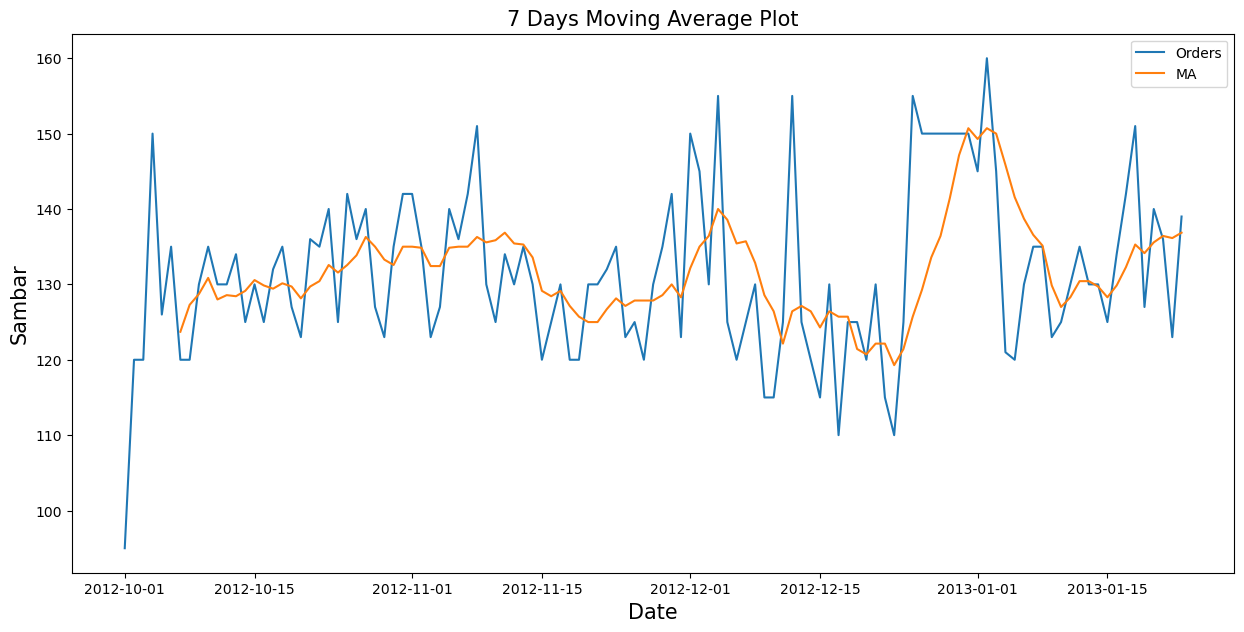

Mean Absolute Error is 6.86
Mean Absolute Percentage Error is 5.18 %
Forecast Quality is very good


          Date  Sambar    MA_7
0   2012-10-01    95.0     NaN
1   2012-10-02   120.0     NaN
2   2012-10-03   120.0     NaN
3   2012-10-04   150.0     NaN
4   2012-10-05   126.0     NaN
5   2012-10-06   135.0     NaN
6   2012-10-07   120.0  123.71
7   2012-10-08   120.0  127.29
8   2012-10-09   130.0  128.71
9   2012-10-10   135.0  130.86
10  2012-10-11   130.0  128.00
11  2012-10-12   130.0  128.57
12  2012-10-13   134.0  128.43
13  2012-10-14   125.0  129.14
14  2012-10-15   130.0  130.57
15  2012-10-16   125.0  129.86
16  2012-10-17   132.0  129.43
17  2012-10-18   135.0  130.14
18  2012-10-19   127.0  129.71
19  2012-10-20   123.0  128.14
20  2012-10-21   136.0  129.71
21  2012-10-22   135.0  130.43
22  2012-10-23   140.0  132.57
23  2012-10-24   125.0  131.57
24  2012-10-25   142.0  132.57
25  2012-10-26   136.0  133.86
26  2012-10-27   140.0  136.29
27  2012-10-28   127.0  135.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ma_fore_df= ma_df.append(pd.DataFrame({'Date':pd.date_range(start=ma_df['Date'].iloc[-1], periods=5, inclusive='right')}))


In [41]:
ma_forecast('Sambar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['MA_7']= ma_df[item].rolling(7).mean()


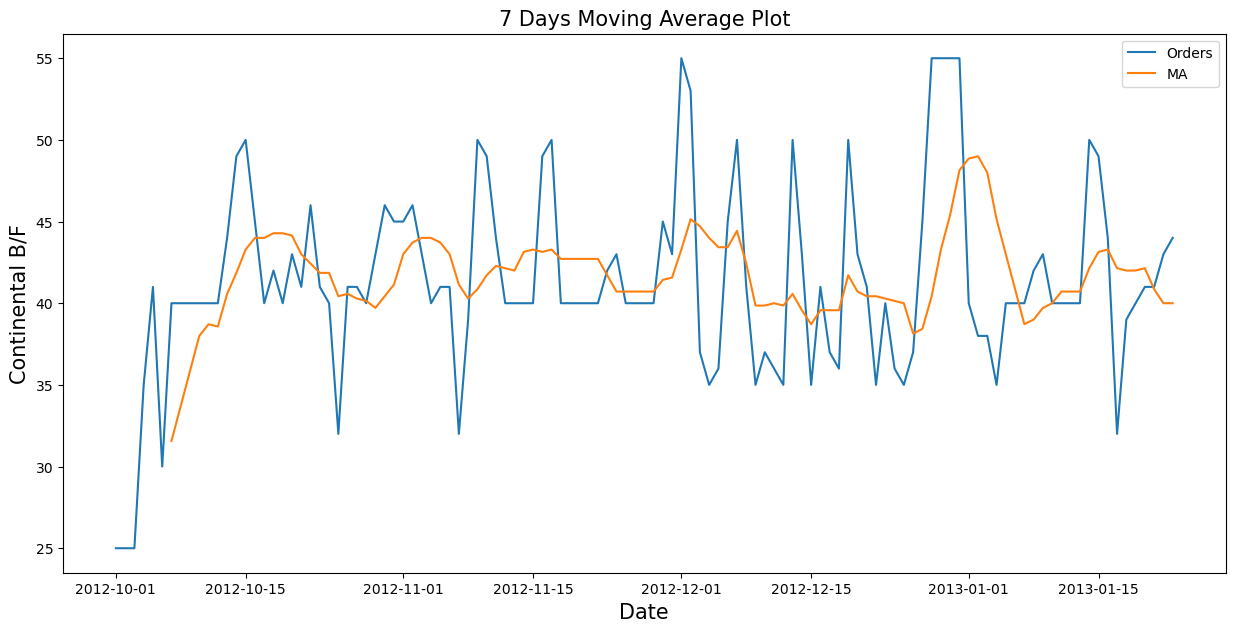

Mean Absolute Error is 3.99
Mean Absolute Percentage Error is 9.49 %
Forecast Quality is very good


          Date  Continental B/F   MA_7
0   2012-10-01             25.0    NaN
1   2012-10-02             25.0    NaN
2   2012-10-03             25.0    NaN
3   2012-10-04             35.0    NaN
4   2012-10-05             41.0    NaN
5   2012-10-06             30.0    NaN
6   2012-10-07             40.0  31.57
7   2012-10-08             40.0  33.71
8   2012-10-09             40.0  35.86
9   2012-10-10             40.0  38.00
10  2012-10-11             40.0  38.71
11  2012-10-12             40.0  38.57
12  2012-10-13             44.0  40.57
13  2012-10-14             49.0  41.86
14  2012-10-15             50.0  43.29
15  2012-10-16             45.0  44.00
16  2012-10-17             40.0  44.00
17  2012-10-18             42.0  44.29
18  2012-10-19             40.0  44.29
19  2012-10-20             43.0  44.14
20  2012-10-21             41.0  43.00
21  2012-10-22             46.0  42.43
22

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ma_fore_df= ma_df.append(pd.DataFrame({'Date':pd.date_range(start=ma_df['Date'].iloc[-1], periods=5, inclusive='right')}))


In [42]:
ma_forecast('Continental B/F')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['MA_7']= ma_df[item].rolling(7).mean()


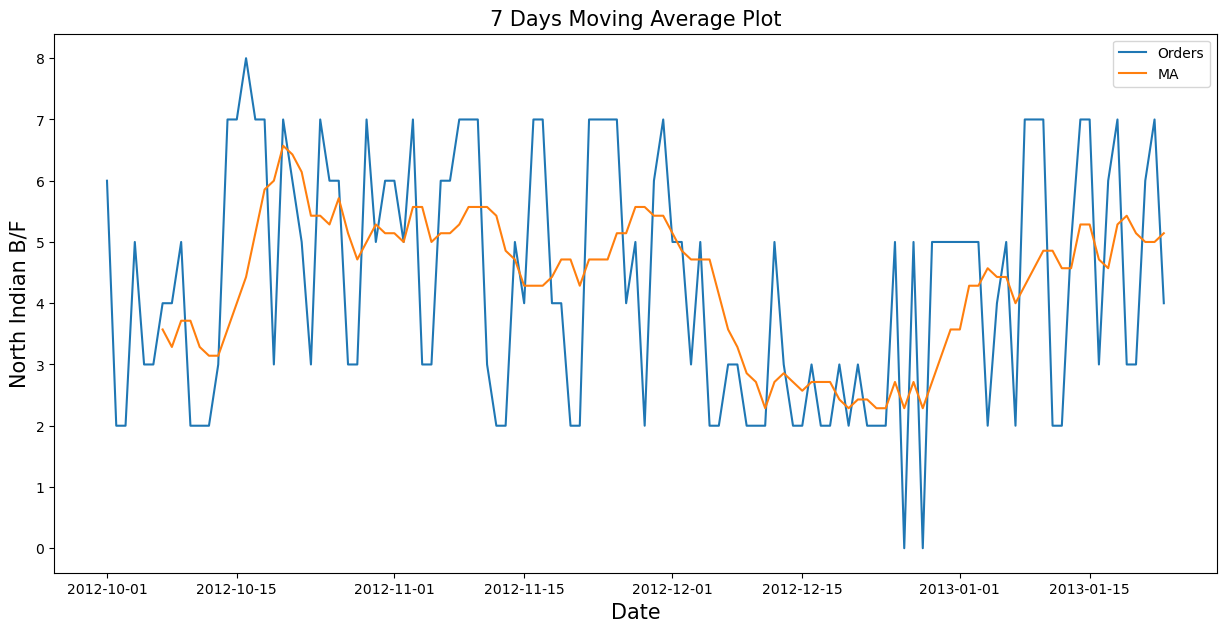

Mean Absolute Error is 1.45
Mean Absolute Percentage Error is 18887966982418892.00 %
Forecast Quality is poor


          Date  North Indian B/F  MA_7
0   2012-10-01               6.0   NaN
1   2012-10-02               2.0   NaN
2   2012-10-03               2.0   NaN
3   2012-10-04               5.0   NaN
4   2012-10-05               3.0   NaN
5   2012-10-06               3.0   NaN
6   2012-10-07               4.0  3.57
7   2012-10-08               4.0  3.29
8   2012-10-09               5.0  3.71
9   2012-10-10               2.0  3.71
10  2012-10-11               2.0  3.29
11  2012-10-12               2.0  3.14
12  2012-10-13               3.0  3.14
13  2012-10-14               7.0  3.57
14  2012-10-15               7.0  4.00
15  2012-10-16               8.0  4.43
16  2012-10-17               7.0  5.14
17  2012-10-18               7.0  5.86
18  2012-10-19               3.0  6.00
19  2012-10-20               7.0  6.57
20  2012-10-21               6.0  6.43
21  2012-10-22               5

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ma_fore_df= ma_df.append(pd.DataFrame({'Date':pd.date_range(start=ma_df['Date'].iloc[-1], periods=5, inclusive='right')}))


In [43]:
ma_forecast('North Indian B/F')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['MA_7']= ma_df[item].rolling(7).mean()


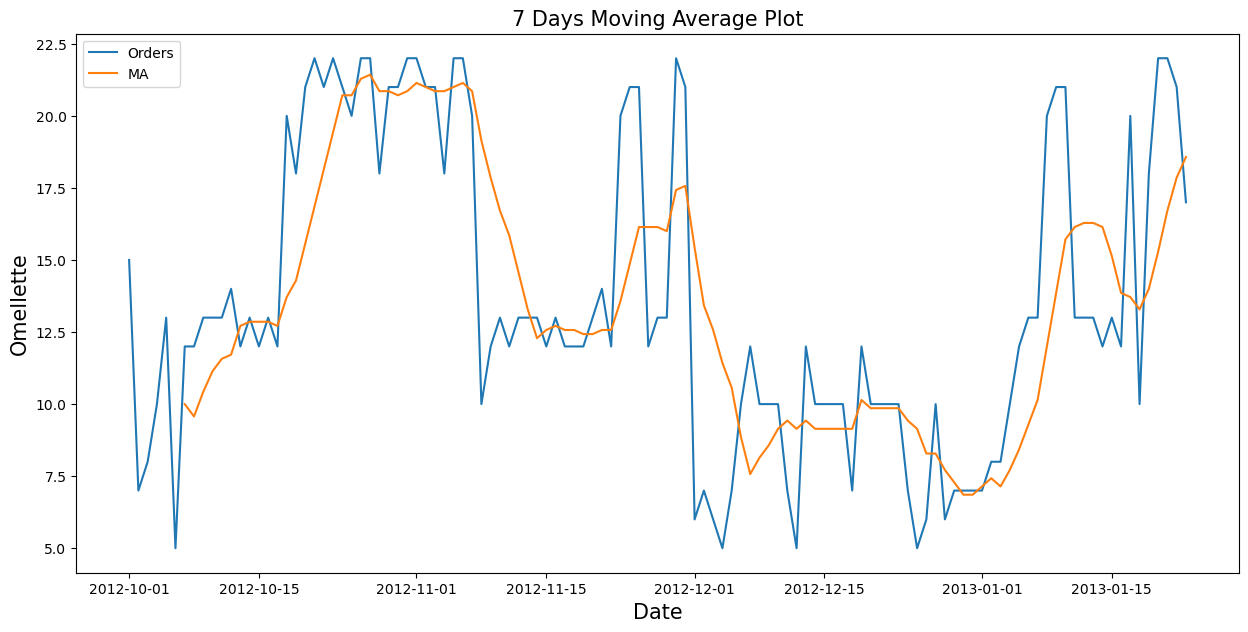

Mean Absolute Error is 2.52
Mean Absolute Percentage Error is 21.72 %
Forecast Quality is moderate


          Date  Omellette   MA_7
0   2012-10-01       15.0    NaN
1   2012-10-02        7.0    NaN
2   2012-10-03        8.0    NaN
3   2012-10-04       10.0    NaN
4   2012-10-05       13.0    NaN
5   2012-10-06        5.0    NaN
6   2012-10-07       12.0  10.00
7   2012-10-08       12.0   9.57
8   2012-10-09       13.0  10.43
9   2012-10-10       13.0  11.14
10  2012-10-11       13.0  11.57
11  2012-10-12       14.0  11.71
12  2012-10-13       12.0  12.71
13  2012-10-14       13.0  12.86
14  2012-10-15       12.0  12.86
15  2012-10-16       13.0  12.86
16  2012-10-17       12.0  12.71
17  2012-10-18       20.0  13.71
18  2012-10-19       18.0  14.29
19  2012-10-20       21.0  15.57
20  2012-10-21       22.0  16.86
21  2012-10-22       21.0  18.14
22  2012-10-23       22.0  19.43
23  2012-10-24       21.0  20.71
24  2012-10-25       20.0  20.71
25  2012-10-26       22.0  21.29
26  2012

C:\Users\Admin\AppData\Local\Temp\ipykernel_28340\3075296871.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ma_fore_df= ma_df.append(pd.DataFrame({'Date':pd.date_range(start=ma_df['Date'].iloc[-1], periods=5, inclusive='right')}))


In [44]:
ma_forecast('Omellette')

### Simple Exponential Smoothing

In [28]:
def ses_forecast(item):
    #Create dataframe
    ses_df= df[['Date',item]]
    #Exponential Smoothing with alpha= 0.2
    fit1= SimpleExpSmoothing(ses_df[item]).fit(smoothing_level= 0.2, optimized= False)
    ses_df['0.2 Exp Smoothing']= fit1.fittedvalues
    #Exponential Smoothing with best alpha
    fit2= SimpleExpSmoothing(ses_df[item]).fit()
    ses_df['Best Exp Smoothing']= fit2.fittedvalues
    
    #Plotting the figure
    plt.figure(figsize=(15,7))
    plt.plot('Date', item, data= ses_df, label= 'Orders')
    plt.plot('Date', '0.2 Exp Smoothing', data= ses_df, label= r"$\alpha=%s$" % fit1.model.params["smoothing_level"])
    plt.plot('Date', 'Best Exp Smoothing', data= ses_df, 
             label= r"$\alpha=%s$" % fit2.model.params["smoothing_level"].round(2))
    plt.xlabel('Date', size= 15)
    plt.ylabel(item, size= 15)
    plt.title('Exponential Smoothing Plot', size= 15)
    plt.legend()
    plt.show()
    
    #Forecast Quality
    def res_qual(mape):
        if mape<= 0.1:
            print('Forecast Quality is very good')
        elif mape<= 0.2:
            print('Forecast Quality is good')
        elif mape<= 0.3:
            print('Forecast Quality is moderate')
        else:
            print('Forecast Quality is poor')
    
    #Errors
    mae_fit1= mean_absolute_error(ses_df[item], ses_df['0.2 Exp Smoothing'])
    mape_fit1= mean_absolute_percentage_error(ses_df[item], ses_df['0.2 Exp Smoothing'])
    print('For alpha=0.2 Exponential Smoothing:')
    print('Mean Absolute Error is %.2f' %mae_fit1)
    print('Mean Absolute Percentage Error is %.2f' %(mape_fit1*100),'%')
    res_qual(mape_fit1)
    print('\n')
    mae_fit2= mean_absolute_error(ses_df[item], ses_df['Best Exp Smoothing'])
    mape_fit2= mean_absolute_percentage_error(ses_df[item], ses_df['Best Exp Smoothing'])
    print('For alpha=%s Exponential Smoothing:' % fit2.model.params["smoothing_level"].round(2))
    print('Mean Absolute Error is %.2f' %mae_fit2)
    print('Mean Absolute Percentage Error is %.2f' %(mape_fit2*100),'%')
    res_qual(mape_fit2)
    
    #Forecasted DF
    ses_fore_df= ses_df.append(pd.DataFrame({'Date':pd.date_range(start=ses_df['Date'].iloc[-1], 
                                                                periods=2, inclusive='right')}))
    for i in range(115,):
        ses_fore_df['0.2 Exp Smoothing']= fit1.fittedvalues
        ses_fore_df['Best Exp Smoothing']= fit2.fittedvalues
    
    #Datapoints
    print('\n')
    with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2
                       ):
        print(ses_fore_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['0.2 Exp Smoothing']= fit1.fittedvalues
C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['Best Exp Smoothing']= fit2.fittedvalues


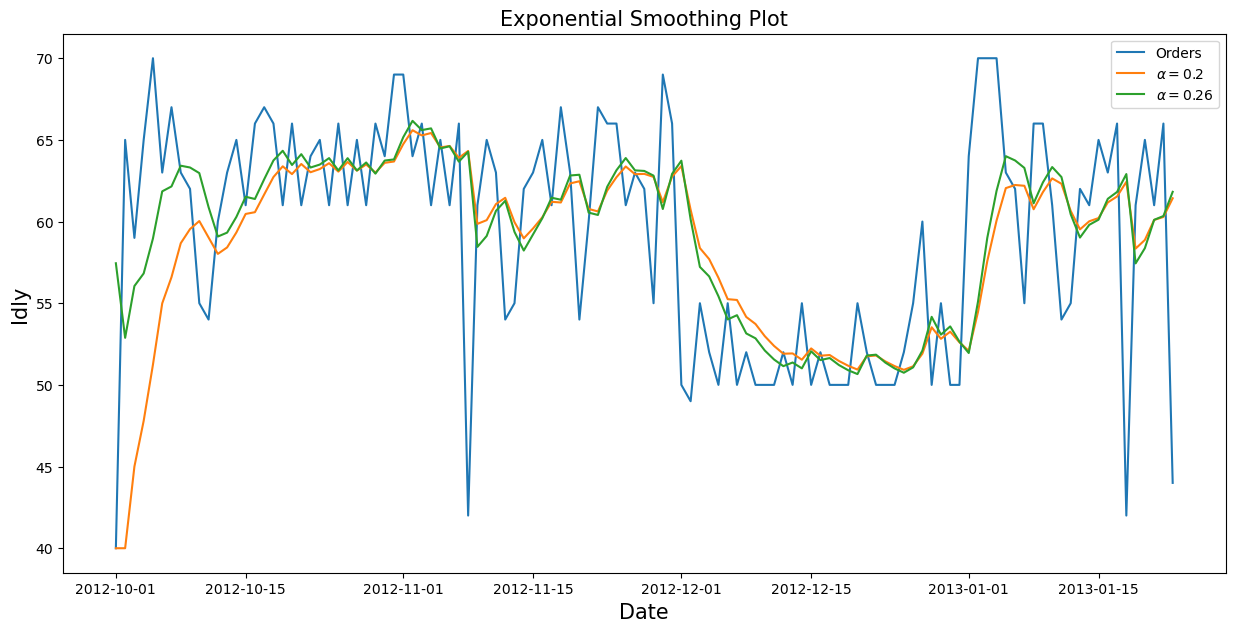

For alpha=0.2 Exponential Smoothing:
Mean Absolute Error is 4.75
Mean Absolute Percentage Error is 8.23 %
Forecast Quality is very good


For alpha=0.26 Exponential Smoothing:
Mean Absolute Error is 4.39
Mean Absolute Percentage Error is 7.81 %
Forecast Quality is very good


          Date  Idly  0.2 Exp Smoothing  Best Exp Smoothing
0   2012-10-01  40.0              40.00               57.45
1   2012-10-02  65.0              40.00               52.88
2   2012-10-03  59.0              45.00               56.05
3   2012-10-04  65.0              47.80               56.82
4   2012-10-05  70.0              51.24               58.96
5   2012-10-06  63.0              54.99               61.85
6   2012-10-07  67.0              56.59               62.15
7   2012-10-08  63.0              58.67               63.42
8   2012-10-09  62.0              59.54               63.31
9   2012-10-10  55.0              60.03               62.97
10  2012-10-11  54.0              59.03               60.88
11 

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ses_fore_df= ses_df.append(pd.DataFrame({'Date':pd.date_range(start=ses_df['Date'].iloc[-1],


In [29]:
ses_forecast('Idly')

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['0.2 Exp Smoothing']= fit1.fittedvalues
C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['Best Exp Smoothing']= fit2.fittedvalues


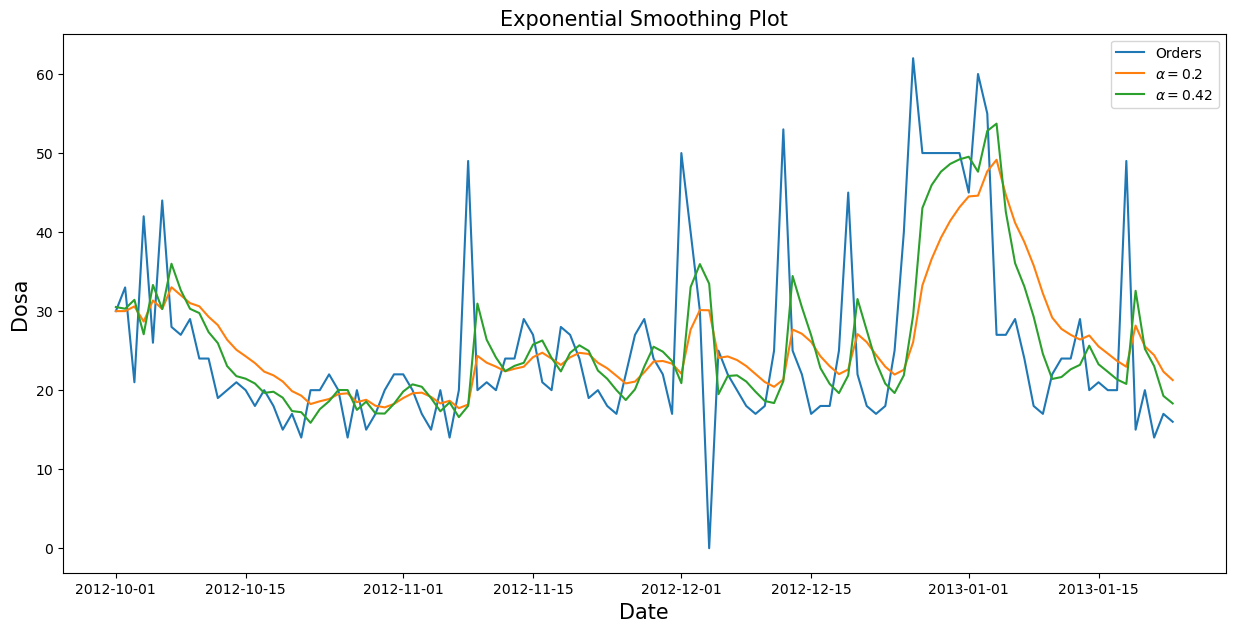

For alpha=0.2 Exponential Smoothing:
Mean Absolute Error is 7.09
Mean Absolute Percentage Error is 117899662079616352.00 %
Forecast Quality is poor


For alpha=0.42 Exponential Smoothing:
Mean Absolute Error is 6.48
Mean Absolute Percentage Error is 131055400311525408.00 %
Forecast Quality is poor


          Date  Dosa  0.2 Exp Smoothing  Best Exp Smoothing
0   2012-10-01  30.0              30.00               30.52
1   2012-10-02  33.0              30.00               30.30
2   2012-10-03  21.0              30.60               31.43
3   2012-10-04  42.0              28.68               27.07
4   2012-10-05  26.0              31.34               33.31
5   2012-10-06  44.0              30.28               30.26
6   2012-10-07  28.0              33.02               36.00
7   2012-10-08  27.0              32.02               32.66
8   2012-10-09  29.0              31.01               30.29
9   2012-10-10  24.0              30.61               29.75
10  2012-10-11  24.0              29.29

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ses_fore_df= ses_df.append(pd.DataFrame({'Date':pd.date_range(start=ses_df['Date'].iloc[-1],


In [30]:
ses_forecast('Dosa')

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['0.2 Exp Smoothing']= fit1.fittedvalues
C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['Best Exp Smoothing']= fit2.fittedvalues


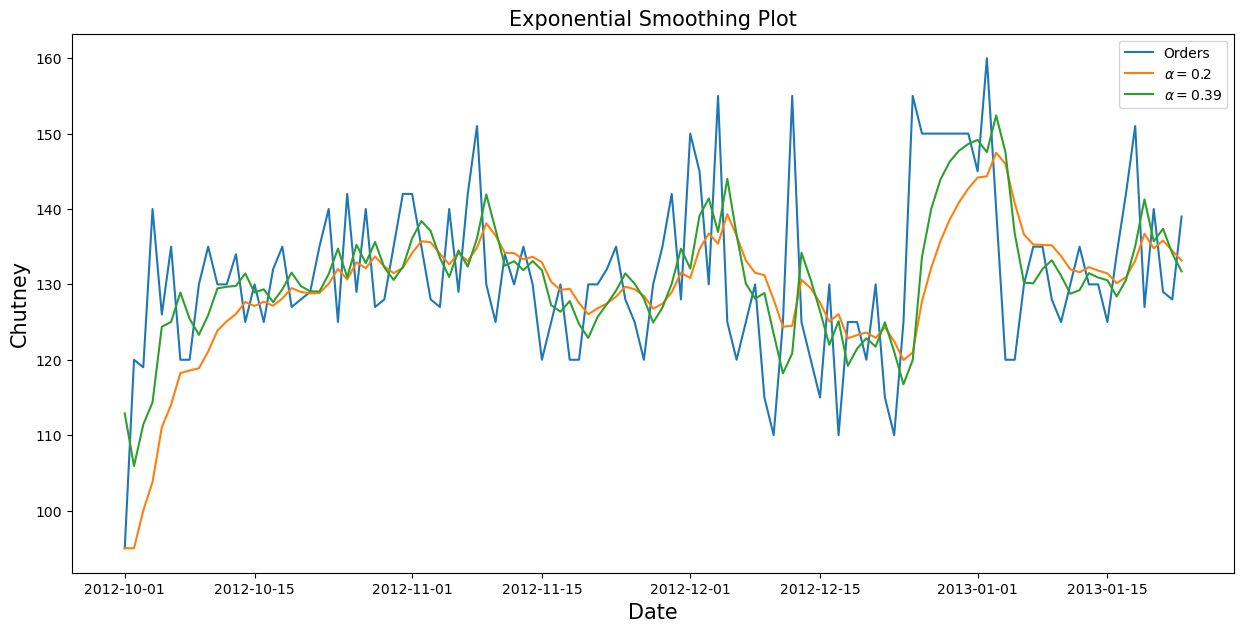

For alpha=0.2 Exponential Smoothing:
Mean Absolute Error is 8.59
Mean Absolute Percentage Error is 6.49 %
Forecast Quality is very good


For alpha=0.39 Exponential Smoothing:
Mean Absolute Error is 8.17
Mean Absolute Percentage Error is 6.24 %
Forecast Quality is very good


          Date  Chutney  0.2 Exp Smoothing  Best Exp Smoothing
0   2012-10-01     95.0              95.00              112.88
1   2012-10-02    120.0              95.00              105.90
2   2012-10-03    119.0             100.00              111.41
3   2012-10-04    140.0             103.80              114.37
4   2012-10-05    126.0             111.04              124.39
5   2012-10-06    135.0             114.03              125.02
6   2012-10-07    120.0             118.23              128.92
7   2012-10-08    120.0             118.58              125.43
8   2012-10-09    130.0             118.86              123.31
9   2012-10-10    135.0             121.09              125.92
10  2012-10-11    130.0       

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ses_fore_df= ses_df.append(pd.DataFrame({'Date':pd.date_range(start=ses_df['Date'].iloc[-1],


In [31]:
ses_forecast('Chutney')

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['0.2 Exp Smoothing']= fit1.fittedvalues
C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['Best Exp Smoothing']= fit2.fittedvalues


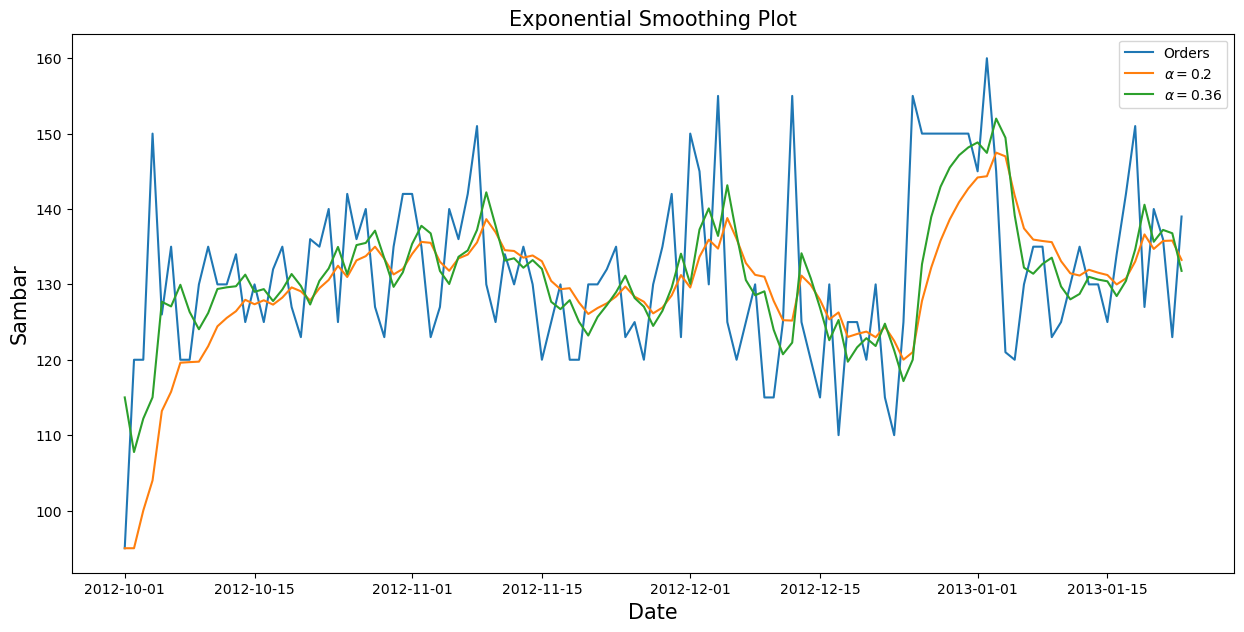

For alpha=0.2 Exponential Smoothing:
Mean Absolute Error is 8.83
Mean Absolute Percentage Error is 6.65 %
Forecast Quality is very good


For alpha=0.36 Exponential Smoothing:
Mean Absolute Error is 8.40
Mean Absolute Percentage Error is 6.42 %
Forecast Quality is very good


          Date  Sambar  0.2 Exp Smoothing  Best Exp Smoothing
0   2012-10-01    95.0              95.00              115.00
1   2012-10-02   120.0              95.00              107.76
2   2012-10-03   120.0             100.00              112.19
3   2012-10-04   150.0             104.00              115.02
4   2012-10-05   126.0             113.20              127.69
5   2012-10-06   135.0             115.76              127.08
6   2012-10-07   120.0             119.61              129.95
7   2012-10-08   120.0             119.69              126.34
8   2012-10-09   130.0             119.75              124.05
9   2012-10-10   135.0             121.80              126.20
10  2012-10-11   130.0             124.44

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ses_fore_df= ses_df.append(pd.DataFrame({'Date':pd.date_range(start=ses_df['Date'].iloc[-1],


In [32]:
ses_forecast('Sambar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['0.2 Exp Smoothing']= fit1.fittedvalues
C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['Best Exp Smoothing']= fit2.fittedvalues


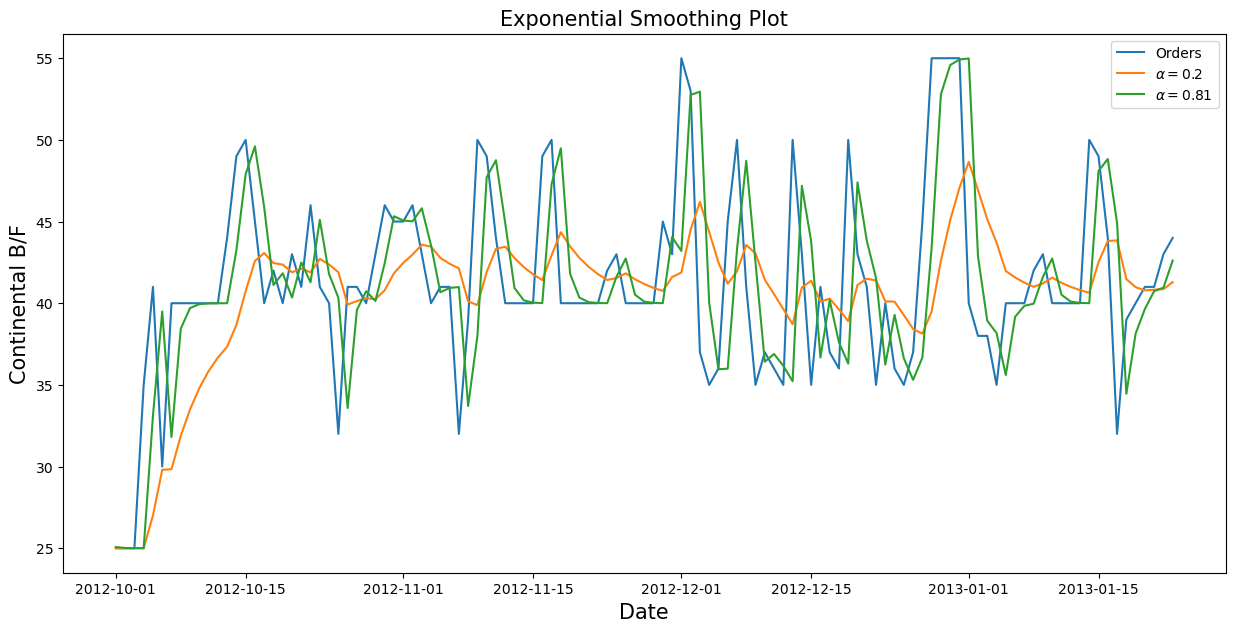

For alpha=0.2 Exponential Smoothing:
Mean Absolute Error is 4.34
Mean Absolute Percentage Error is 10.35 %
Forecast Quality is good


For alpha=0.81 Exponential Smoothing:
Mean Absolute Error is 3.69
Mean Absolute Percentage Error is 8.99 %
Forecast Quality is very good


          Date  Continental B/F  0.2 Exp Smoothing  Best Exp Smoothing
0   2012-10-01             25.0              25.00               25.07
1   2012-10-02             25.0              25.00               25.01
2   2012-10-03             25.0              25.00               25.00
3   2012-10-04             35.0              25.00               25.00
4   2012-10-05             41.0              27.00               33.10
5   2012-10-06             30.0              29.80               39.50
6   2012-10-07             40.0              29.84               31.81
7   2012-10-08             40.0              31.87               38.44
8   2012-10-09             40.0              33.50               39.70
9   2012-10-10   

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ses_fore_df= ses_df.append(pd.DataFrame({'Date':pd.date_range(start=ses_df['Date'].iloc[-1],


In [33]:
ses_forecast('Continental B/F')

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['0.2 Exp Smoothing']= fit1.fittedvalues
C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['Best Exp Smoothing']= fit2.fittedvalues


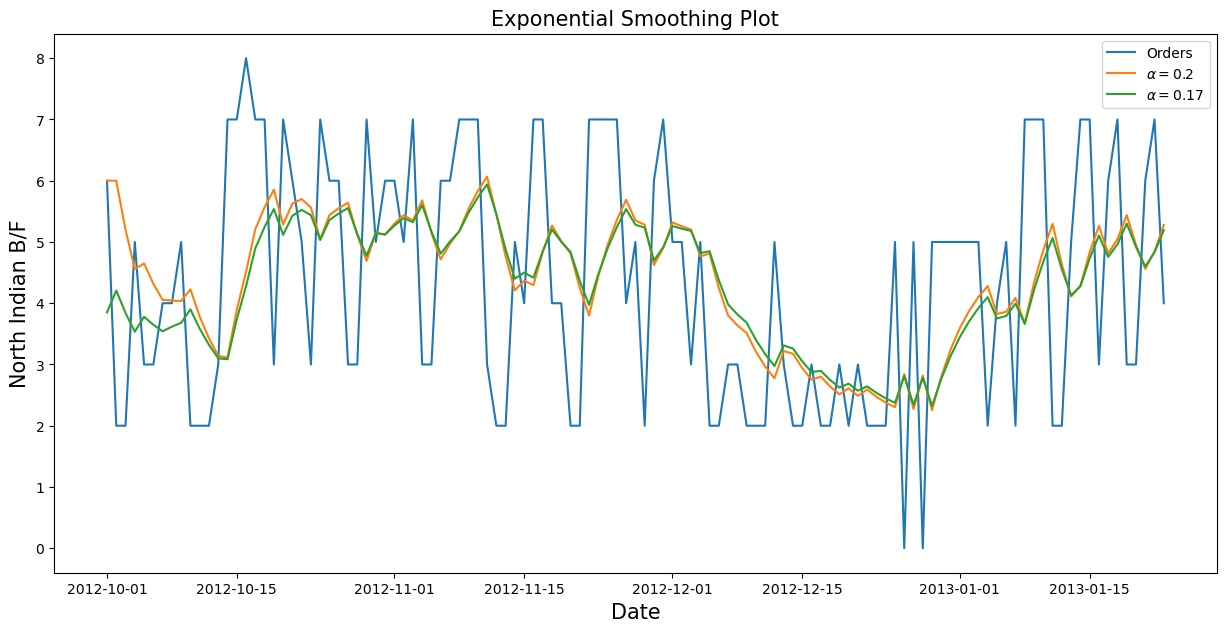

For alpha=0.2 Exponential Smoothing:
Mean Absolute Error is 1.65
Mean Absolute Percentage Error is 22168701109023880.00 %
Forecast Quality is poor


For alpha=0.17 Exponential Smoothing:
Mean Absolute Error is 1.65
Mean Absolute Percentage Error is 21905095861206288.00 %
Forecast Quality is poor


          Date  North Indian B/F  0.2 Exp Smoothing  Best Exp Smoothing
0   2012-10-01               6.0               6.00                3.85
1   2012-10-02               2.0               6.00                4.21
2   2012-10-03               2.0               5.20                3.84
3   2012-10-04               5.0               4.56                3.53
4   2012-10-05               3.0               4.65                3.78
5   2012-10-06               3.0               4.32                3.65
6   2012-10-07               4.0               4.05                3.54
7   2012-10-08               4.0               4.04                3.62
8   2012-10-09               5.0               4.04  

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ses_fore_df= ses_df.append(pd.DataFrame({'Date':pd.date_range(start=ses_df['Date'].iloc[-1],


In [34]:
ses_forecast('North Indian B/F')

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['0.2 Exp Smoothing']= fit1.fittedvalues
C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ses_df['Best Exp Smoothing']= fit2.fittedvalues


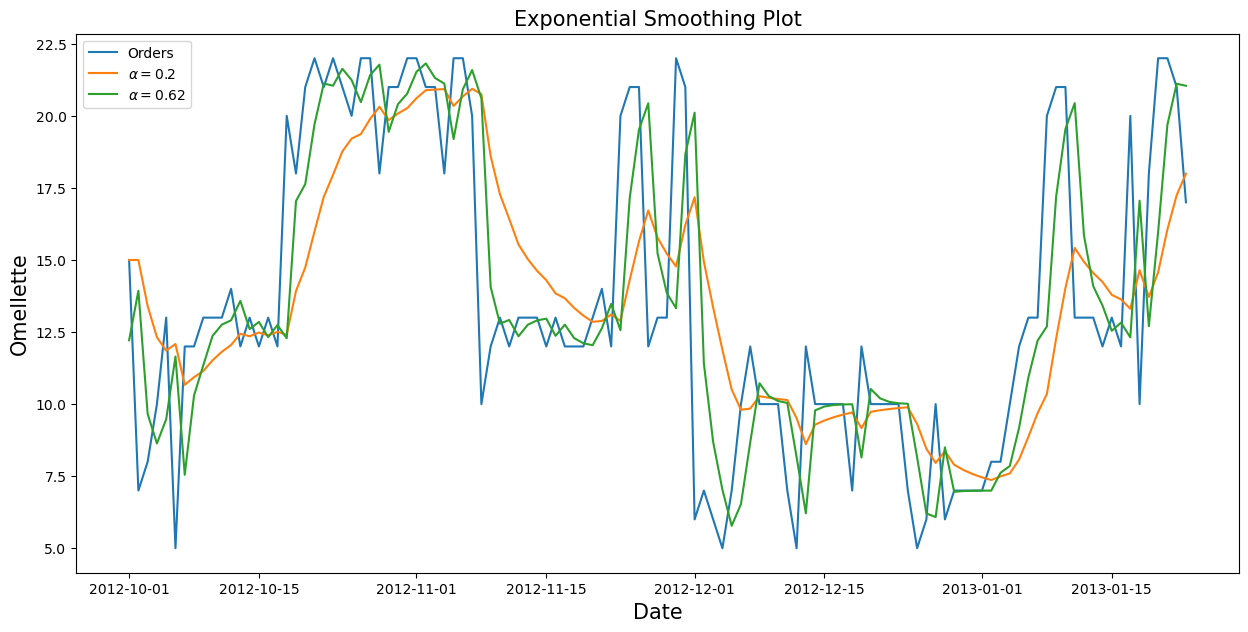

For alpha=0.2 Exponential Smoothing:
Mean Absolute Error is 2.90
Mean Absolute Percentage Error is 25.85 %
Forecast Quality is moderate


For alpha=0.62 Exponential Smoothing:
Mean Absolute Error is 2.30
Mean Absolute Percentage Error is 20.61 %
Forecast Quality is moderate


          Date  Omellette  0.2 Exp Smoothing  Best Exp Smoothing
0   2012-10-01       15.0              15.00               12.22
1   2012-10-02        7.0              15.00               13.93
2   2012-10-03        8.0              13.40                9.66
3   2012-10-04       10.0              12.32                8.63
4   2012-10-05       13.0              11.86                9.48
5   2012-10-06        5.0              12.08               11.65
6   2012-10-07       12.0              10.67                7.55
7   2012-10-08       12.0              10.93               10.29
8   2012-10-09       13.0              11.15               11.35
9   2012-10-10       13.0              11.52               12.37
10  2012

C:\Users\Admin\AppData\Local\Temp\ipykernel_33804\3089487091.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ses_fore_df= ses_df.append(pd.DataFrame({'Date':pd.date_range(start=ses_df['Date'].iloc[-1],


In [35]:
ses_forecast('Omellette')

## Decomposition for North Indian Breakfast

In [53]:
#Package Import
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
#Setting date column as index
decomp_df= df.set_index('Date')

In [55]:
#Data Modelling
decomp_res= seasonal_decompose(decomp_df['North Indian B/F'], period= 7) #Assume seasonality of 7 days

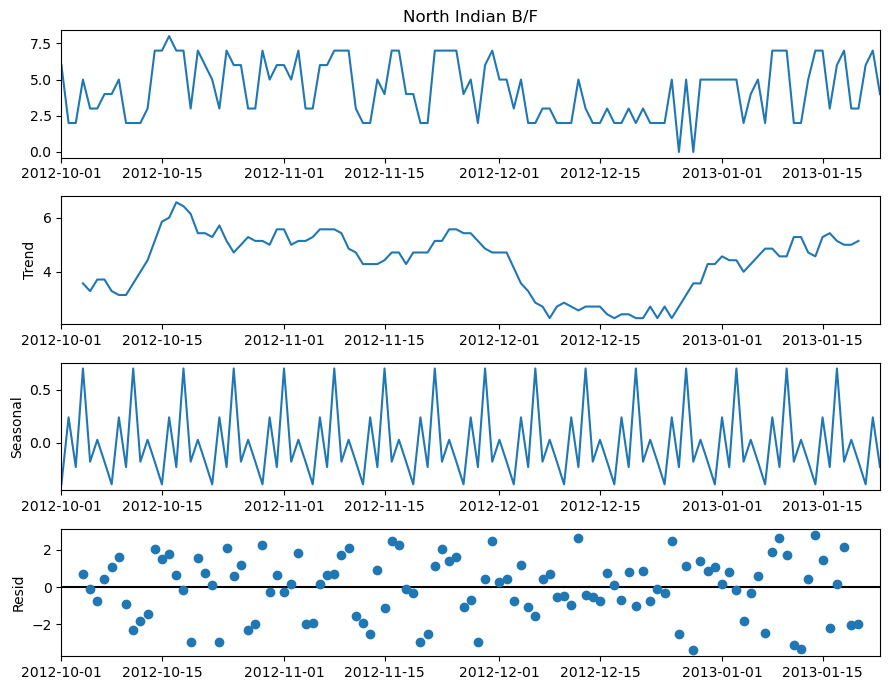

In [57]:
#Result Plots
with plt.rc_context():
    plt.rc("figure", figsize= (9,7))
    decomp_res.plot()